In [588]:
!pip uninstall -y xgboost lightgbm

In [589]:
!pip install xgboost==1.5.0 lightgbm==3.3.2

  Using cached xgboost-1.5.0.tar.gz (728 kB)
  Preparing metadata (setup.py) ... done
  Using cached lightgbm-3.3.2.tar.gz (1.5 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1802 lines of output]
      /Users/chabyeong-gon/anaconda3/lib/python3.11/site-packages/setuptools/dist.py:745: SetuptoolsDeprecationWarning: Invalid dash-separated options
      !!
      
              ********************************************************************************
              Usage of dash-separated 'description-file' will not be supported in future
              versions. Please use the underscore name 'description_file' instead.
      
              This deprecation is overdue, please update your project and remove deprecated
              calls to avoid build errors in the future.
      
              See https://setuptools.pypa.io/en/latest/userguide/declarative_config.h

In [590]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

## 데이터 정보 확인

In [591]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170883 entries, 0 to 170882
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      170883 non-null  int64  
 1   Time    170883 non-null  float64
 2   V1      170883 non-null  float64
 3   V2      170883 non-null  float64
 4   V3      170883 non-null  float64
 5   V4      170883 non-null  float64
 6   V5      170883 non-null  float64
 7   V6      170883 non-null  float64
 8   V7      170883 non-null  float64
 9   V8      170883 non-null  float64
 10  V9      170883 non-null  float64
 11  V10     170883 non-null  float64
 12  V11     170883 non-null  float64
 13  V12     170883 non-null  float64
 14  V13     170883 non-null  float64
 15  V14     170883 non-null  float64
 16  V15     170883 non-null  float64
 17  V16     170883 non-null  float64
 18  V17     170883 non-null  float64
 19  V18     170883 non-null  float64
 20  V19     170883 non-null  float64
 21  V20     17

In [592]:
train_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [593]:
train_df.tail()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
170878,170878,120394.0,2.085243,0.153914,-1.937797,0.455977,0.457744,-1.599438,0.828357,-0.606184,...,0.146098,0.674611,-0.092485,0.116184,0.578814,-0.074287,-0.049963,-0.071206,13.12,0
170879,170879,120395.0,1.941601,-0.105717,-2.025099,0.021689,1.257679,1.180161,-0.212451,0.406611,...,-0.275532,-0.651069,0.353144,-1.058401,-0.454839,0.282256,-0.022103,-0.058297,1.98,0
170880,170880,120395.0,-0.184060,1.192288,-0.831053,-0.379134,0.898165,-0.494622,0.780753,-0.873814,...,0.755613,-0.315061,0.223707,0.640872,-1.259095,0.179031,0.105884,0.271658,17.60,0
170881,170881,120395.0,1.418125,-1.676690,-0.942455,0.734790,-0.915707,0.286333,-0.420231,0.070484,...,-0.078157,-0.408628,0.023694,0.628874,-0.337955,-0.753715,-0.002207,0.020888,327.60,0
170882,170882,120396.0,-1.484133,0.482801,0.581427,-1.366978,1.357335,2.938535,-0.023507,0.896091,...,0.193111,1.236385,-0.076923,-1.629365,-0.098827,0.784932,0.575216,0.261107,45.90,0


## EDA

- <b>정상 거래와 사기 거래 비율 계산 및 시각화</b>
- 약 99.8%는 정상 거래
- 약 0.2%가 사기 거래

In [594]:
class_counts = train_df['Class'].value_counts()

print('\n ### 이상거래 건수 ### \n', class_counts)
print('\n ### 이상거래 비율 ### \n',
      train_df['Class'].value_counts()/train_df['Class'].count() * 100)


 ### 이상거래 건수 ### 
 Class
0    170523
1       360
Name: count, dtype: int64

 ### 이상거래 비율 ### 
 Class
0    99.78933
1     0.21067
Name: count, dtype: float64


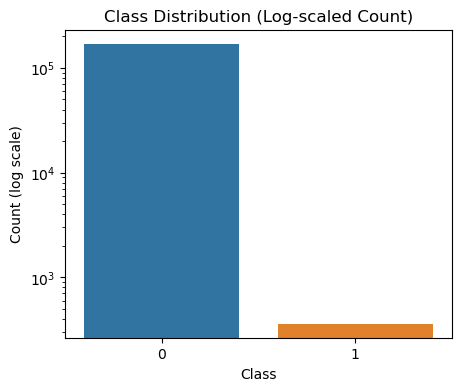

In [595]:
# log 스케일 후 시각화
plt.figure(figsize=(5,4))
sns.barplot(x=class_counts.index, y=class_counts.values)

plt.title('Class Distribution (Log-scaled Count)')
plt.xlabel('Class')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.show()

- <b>금액대별 사기 거래 건수 분포도 </b>
- Amount는 0인데, Class는 = 1인 경우 drop

In [596]:
# Amount 피처의 데이터 종류 확인

print('### Amount 피처의 데이터 ###',
      '\n 데이터 종류 건수:',train_df['Amount'].nunique(), 
      '\n 가장 작은 수:',train_df['Amount'].min(), 
      '\n 가장 큰 수:',train_df['Amount'].max())

### Amount 피처의 데이터 ### 
 데이터 종류 건수: 25136 
 가장 작은 수: 0.0 
 가장 큰 수: 19656.53


In [597]:
# EDA용 DataFrame
fraud_df = train_df[train_df['Class'] == 1]
fraud_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [598]:
# 사기 거래 건수 360
fraud_df.shape[0]

360

In [599]:
# 사기 거래인데 Amount이 0인 경우 16건
fraud_df[fraud_df['Amount'] == 0].shape[0]

16

In [600]:
# 사기 거래인데 Amount이 0인 경우 삭제
idx = train_df[(train_df['Class'] == 1) & (train_df['Amount'] == 0)].index
train_df_drop = train_df.drop(idx)

fraud_df = fraud_df[fraud_df['Amount'] != 0]
fraud_df.shape[0]

344

In [601]:
fraud_df['Amount'].max()

1809.68

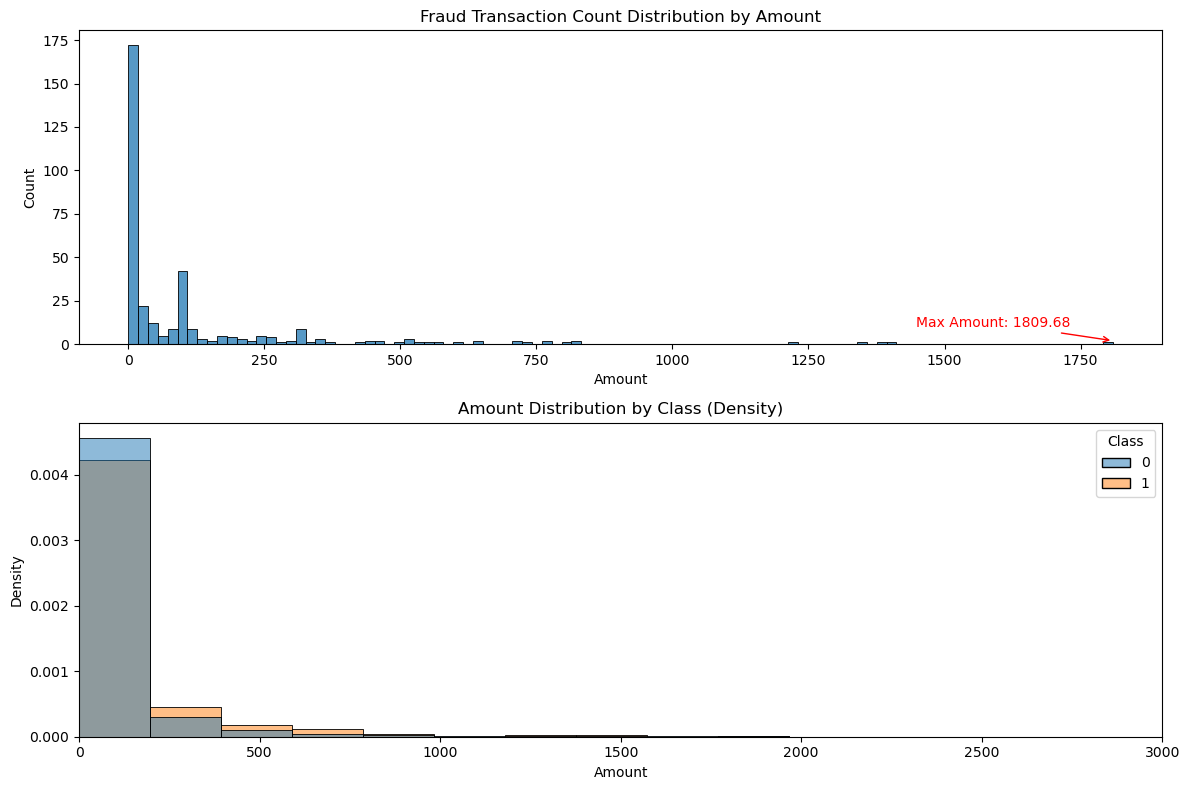

In [602]:
max_amount = fraud_df['Amount'].max()

fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# 사기 거래만 (건수 분포)
ax1 = axes[0]
sns.histplot(
    data=fraud_df,
    x='Amount',
    bins=100,
    ax=ax1
)

ax1.annotate(
    f'Max Amount: {max_amount:.2f}',
    xy=(max_amount, 2),
    xytext=(max_amount * 0.8, 10),
    arrowprops=dict(arrowstyle='->', color='red'),
    color='red'
)

ax1.set_title('Fraud Transaction Count Distribution by Amount')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Count')


# 전체 데이터 (Class별 density 분포)
ax2 = axes[1]
sns.histplot(
    data=train_df_drop,
    x='Amount',
    hue='Class',
    bins=100,
    stat='density',
    common_norm=False,
    ax=ax2
)

ax2.set_xlim(0, 3000)
ax2.set_title('Amount Distribution by Class (Density)')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Density')

plt.tight_layout()
plt.show()

- <b>시간대별 정상 거래와 사기 거래 건수 비율 분포도</b>
- 사기 거래는 정상 거래가 잘 일어나지 않던 시간대(0-30,000과 82,000-110,000)에 많이 일어남
- 특이 케이스로 4만 시간대에는 정상 거래가 많지만, 이상 거래량도 갑자기 늘어남

In [603]:
# Time 피처의 데이터 종류 확인

print('### Time 피처의 데이터 ###',
      '\n 데이터 종류 건수:',train_df['Time'].nunique(), 
      '\n 가장 작은 수:',train_df['Time'].min(), 
      '\n 가장 큰 수:',train_df['Time'].max())

### Time 피처의 데이터 ### 
 데이터 종류 건수: 78599 
 가장 작은 수: 0.0 
 가장 큰 수: 120396.0


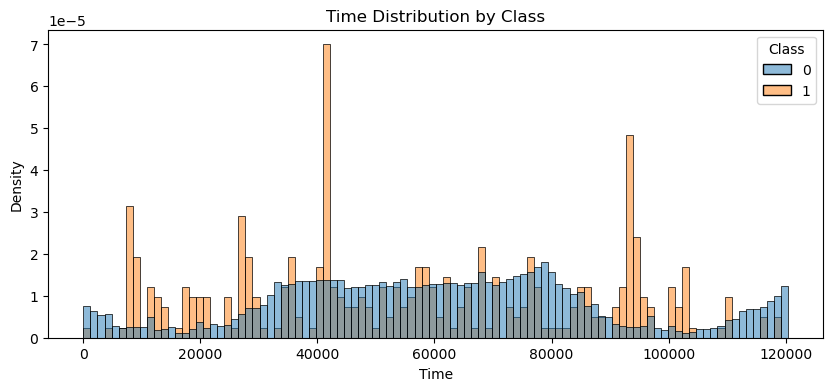

In [604]:
plt.figure(figsize=(10,4))
sns.histplot(
    data=train_df_drop,
    x='Time',
    hue='Class',
    bins=100,
    stat='density',
    common_norm=False
)

plt.title('Time Distribution by Class')
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()

## 모델 테스트

In [605]:
# 데이터 준비
X = train_df_drop.drop(['id', 'Class'], axis=1)
y = train_df_drop['Class']

In [606]:
# train_df를 학습용과 테스트용으로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [607]:
print('학습 데이터 간 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('검증 데이터 간 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 간 레이블 값 비율
Class
0    99.798819
1     0.201181
Name: count, dtype: float64
검증 데이터 간 레이블 값 비율
Class
0    99.798092
1     0.201908
Name: count, dtype: float64


In [608]:
# 평가지표 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [609]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [610]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# 1. 모델 정의 (불균형 대응 포함)
dt_clf = DecisionTreeClassifier(
    random_state=11,
    class_weight='balanced'
)

rf_clf = RandomForestClassifier(
    random_state=11,
    class_weight='balanced',
    n_estimators=200,
    n_jobs=-1
)

lr_clf = LogisticRegression(
    random_state=11,
    class_weight='balanced',
    max_iter=1000
)

xgb_clf = XGBClassifier(
    random_state=11,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),
    eval_metric='logloss'
)

models = {
    'DecisionTree': dt_clf,
    'RandomForest': rf_clf,
    'LogisticRegression': lr_clf,
    'XGBoost': xgb_clf
}

# 2. 모델 학습 / 예측 / 평가
for name, model in models.items():
    print(f'\n### {name} ###')
    
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]
    
    get_clf_eval(y_test, pred, pred_proba)


### DecisionTree ###
오차 행렬
[[34095    10]
 [   18    51]]
정확도: 0.9992, 정밀도: 0.8361, 재현율: 0.7391,    F1: 0.7846, AUC:0.8694

### RandomForest ###
오차 행렬
[[34104     1]
 [   15    54]]
정확도: 0.9995, 정밀도: 0.9818, 재현율: 0.7826,    F1: 0.8710, AUC:0.9317

### LogisticRegression ###
오차 행렬
[[33271   834]
 [    9    60]]
정확도: 0.9753, 정밀도: 0.0671, 재현율: 0.8696,    F1: 0.1246, AUC:0.9686

### XGBoost ###
오차 행렬
[[34101     4]
 [   11    58]]
정확도: 0.9996, 정밀도: 0.9355, 재현율: 0.8406,    F1: 0.8855, AUC:0.9645


In [611]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_clf),
        ('rf', rf_clf),
        ('xgb', xgb_clf)
    ],
    voting='soft',
    n_jobs=1
)

In [612]:
voting_clf.fit(X_train, y_train)

voting_pred = voting_clf.predict(X_test)
voting_proba = voting_clf.predict_proba(X_test)[:, 1]

print('### Soft Voting Ensemble ###')
get_clf_eval(y_test, voting_pred, voting_proba)

### Soft Voting Ensemble ###
오차 행렬
[[34101     4]
 [   11    58]]
정확도: 0.9996, 정밀도: 0.9355, 재현율: 0.8406,    F1: 0.8855, AUC:0.9687


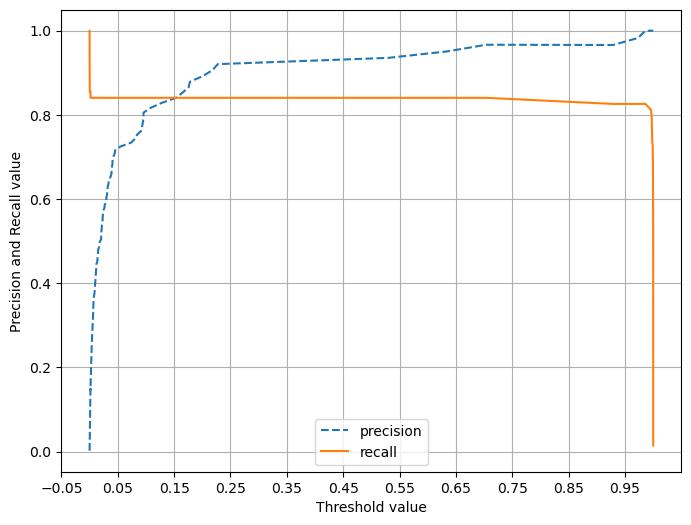

In [613]:
# 위 결과를 통해 앙상블이 XGBoost 모델을 이기지 못한다고 판단하여 XGBoost로 결정
# XGBoost의 precision_recall_curve를 확인하여 적절한 임계값을 가시적으로 확인
pred_proba = xgb_clf.predict_proba(X_test)[:, 1]

precision_recall_curve_plot(y_test, pred_proba)

In [614]:
# 위 그래프를 통해 0.05에서 0.3까지 적절한 임계값 탐색

from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [615]:
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
pred_proba = xgb_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.05
오차 행렬
[[34083    22]
 [   11    58]]
정확도: 0.9990, 정밀도: 0.7250, 재현율: 0.8406,    F1: 0.7785, AUC:0.9645
임곗값: 0.1
오차 행렬
[[34092    13]
 [   11    58]]
정확도: 0.9993, 정밀도: 0.8169, 재현율: 0.8406,    F1: 0.8286, AUC:0.9645
임곗값: 0.15
오차 행렬
[[34094    11]
 [   11    58]]
정확도: 0.9994, 정밀도: 0.8406, 재현율: 0.8406,    F1: 0.8406, AUC:0.9645
임곗값: 0.2
오차 행렬
[[34098     7]
 [   11    58]]
정확도: 0.9995, 정밀도: 0.8923, 재현율: 0.8406,    F1: 0.8657, AUC:0.9645
임곗값: 0.25
오차 행렬
[[34101     4]
 [   11    58]]
정확도: 0.9996, 정밀도: 0.9355, 재현율: 0.8406,    F1: 0.8855, AUC:0.9645
임곗값: 0.3
오차 행렬
[[34101     4]
 [   11    58]]
정확도: 0.9996, 정밀도: 0.9355, 재현율: 0.8406,    F1: 0.8855, AUC:0.9645
임곗값: 0.35
오차 행렬
[[34101     4]
 [   11    58]]
정확도: 0.9996, 정밀도: 0.9355, 재현율: 0.8406,    F1: 0.8855, AUC:0.9645


In [616]:
# 임곗값를 0.3로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.3)

# 위에서 구한 xgb_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_03 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 
 
get_clf_eval(y_test , pred_th_03, pred_proba[:, 1])

오차 행렬
[[34101     4]
 [   11    58]]
정확도: 0.9996, 정밀도: 0.9355, 재현율: 0.8406,    F1: 0.8855, AUC:0.9645


In [617]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': [300, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

grid_dclf = GridSearchCV(xgb_clf, param_grid=parameters, scoring='roc_auc', cv=3, n_jobs=1)
grid_dclf.fit(X_train, y_train)

print('Best Params:', grid_dclf.best_params_)
print('Best ROC-AUC:', grid_dclf.best_score_)

best_dclf = grid_dclf.best_estimator_

Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Best ROC-AUC: 0.9873533525815182


In [618]:
pred_proba = best_dclf.predict_proba(X_test)[:, 1]
pred_03 = (pred_proba >= 0.3).astype(int)

get_clf_eval(y_test, pred_03, pred_proba)

오차 행렬
[[34103     2]
 [   11    58]]
정확도: 0.9996, 정밀도: 0.9667, 재현율: 0.8406,    F1: 0.8992, AUC:0.9638


## test_df로 사기 거래 분류

In [619]:
test_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,170883,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,...,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98
1,170884,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,...,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00
2,170885,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,...,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69
3,170886,120396.0,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,...,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,59.99
4,170887,120396.0,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,...,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,119.97


In [620]:
X_test = test_df.drop(['id'], axis=1)
test_ids = test_df['id']

X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,-2.277774,...,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98
1,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,0.529802,...,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00
2,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,-0.648266,...,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69
3,120396.0,-1.303150,0.187865,0.944395,-1.277834,1.236744,-1.301696,1.402234,-0.558914,-0.041604,...,-0.251346,-0.274175,-0.656826,-0.164985,0.001284,-0.001842,-0.024050,-0.436872,0.051705,59.99
4,120396.0,1.947883,-1.095332,-1.392121,-0.600598,-0.320840,0.048953,-0.443486,-0.081011,-0.634128,...,-0.293448,-0.250594,-0.385151,0.099030,0.221922,-0.212846,0.586637,-0.071616,-0.045475,119.97


In [621]:
test_proba = best_dclf.predict_proba(X_test)[:, 1]
test_pred = (test_proba >= 0.3).astype(int)


# 3) 제출 파일 생성
submission = pd.DataFrame({
    'id': test_ids,
    'Class': test_pred
})

submission.to_csv('submission.csv', index=False)
submission.head()

,id,Class
0,170883,0
1,170884,0
2,170885,0
3,170886,0
4,170887,0


In [622]:
submission['Class'].value_counts()

Class
0    113809
1       114
Name: count, dtype: int64